In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import matplotlib.pyplot as plt

In [39]:
df_cars = pd.read_csv('https://raw.githubusercontent.com/rebecca182/Coding1_HW1/refs/heads/main/used-cars_2cities_prep.csv', encoding='latin1')
df_cars.head(n=20)
# Filter data for Chicago and Los Angeles
df_chicago = df_cars[df_cars['area'] == 'chicago']
df_los_angeles = df_cars[df_cars['area'] == 'los angeles']


In [26]:
df_cars.columns

Index(['pricestr', 'area', 'subarea', 'name', 'condition', 'cylinders',
       'drive', 'fuel', 'odometer', 'paintcolor', 'size', 'transmission',
       'type', 'dealer', 'price', 'lnprice', 'year', 'age', 'lnodometer', 'LE',
       'XLE', 'SE', 'Hybrid'],
      dtype='object')

In [21]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pricestr      549 non-null    object 
 1   area          549 non-null    object 
 2   subarea       540 non-null    object 
 3   name          549 non-null    object 
 4   condition     327 non-null    object 
 5   cylinders     360 non-null    object 
 6   drive         294 non-null    object 
 7   fuel          548 non-null    object 
 8   odometer      549 non-null    float64
 9   paintcolor    316 non-null    object 
 10  size          193 non-null    object 
 11  transmission  549 non-null    object 
 12  type          301 non-null    object 
 13  dealer        549 non-null    int64  
 14  price         549 non-null    int64  
 15  lnprice       549 non-null    float64
 16  year          549 non-null    int64  
 17  age           549 non-null    int64  
 18  lnodometer    549 non-null    

## CHICAGO

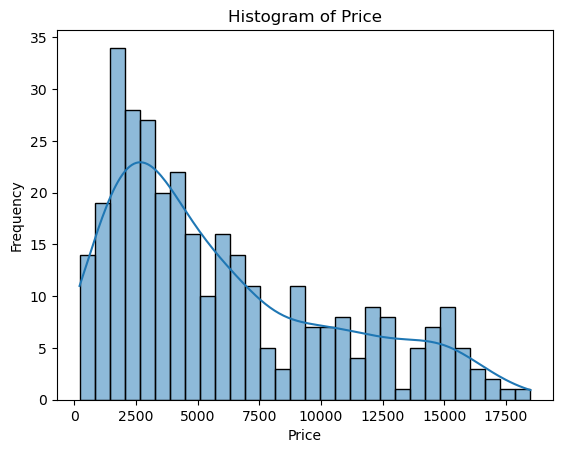

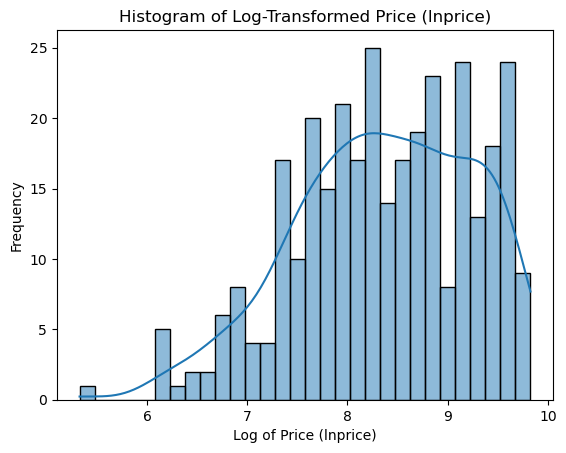

C:\Users\rsegu\AppData\Local\Temp\ipykernel_22444\924495423.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chicago['age_squared'] = df_chicago['age'] ** 2


In [41]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

# Visualization: Histogram of Price
sns.histplot(df_chicago['price'], bins=30, kde=True, edgecolor='k')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualization: Histogram of lnprice
sns.histplot(df_chicago['lnprice'], bins=30, kde=True, edgecolor='k')
plt.title('Histogram of Log-Transformed Price (lnprice)')
plt.xlabel('Log of Price (lnprice)')
plt.ylabel('Frequency')
plt.show()

# Incremental Modeling: Linear Models
# Model 1: Basic model with age as the only predictor
reg_1 = smf.ols(formula='price ~ age', data=df_chicago).fit(cov_type='HC3')

# Model 2: Add lnodometer to the model
reg_2 = smf.ols(formula='price ~ age + lnodometer', data=df_chicago).fit(cov_type='HC3')

# Model 3: Add condition to the model
reg_3 = smf.ols(formula='price ~ age + lnodometer + condition', data=df_chicago).fit(cov_type='HC3')

# Model 4: Add additional variable (e.g., LE and XLE)
reg_4 = smf.ols(formula='price ~ age + lnodometer + condition + LE + XLE', data=df_chicago).fit(cov_type='HC3')

# Nonlinear Modeling: Adding quadratic term for age
df_chicago['age_squared'] = df_chicago['age'] ** 2

# Model 5: Nonlinear model with quadratic term
reg_5 = smf.ols(formula='price ~ age + age_squared + lnodometer + condition + LE + XLE', data=df_chicago).fit(cov_type='HC3')

# Stargazer Summary for Linear and Nonlinear Models
stargazer = Stargazer([reg_1, reg_2, reg_3, reg_4, reg_5])
stargazer


## LOS ANGELES

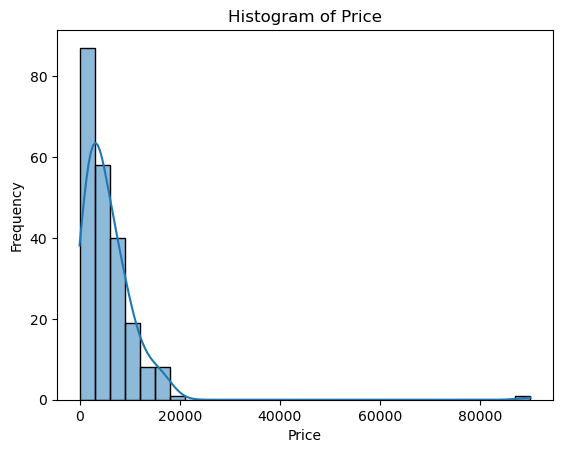

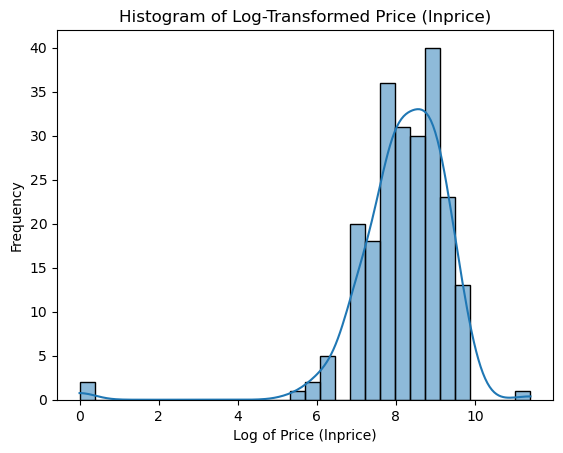

C:\Users\rsegu\AppData\Local\Temp\ipykernel_22444\4164999126.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_los_angeles['age_squared'] = df_los_angeles['age'] ** 2


In [43]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

# Visualization: Histogram of Price
sns.histplot(df_los_angeles['price'], bins=30, kde=True, edgecolor='k')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualization: Histogram of lnprice
sns.histplot(df_los_angeles['lnprice'], bins=30, kde=True, edgecolor='k')
plt.title('Histogram of Log-Transformed Price (lnprice)')
plt.xlabel('Log of Price (lnprice)')
plt.ylabel('Frequency')
plt.show()

# Incremental Modeling: Linear Models
# Model 1: Basic model with age as the only predictor
reg_1 = smf.ols(formula='price ~ age', data=df_los_angeles).fit(cov_type='HC3')

# Model 2: Add lnodometer to the model
reg_2 = smf.ols(formula='price ~ age + lnodometer', data=df_los_angeles).fit(cov_type='HC3')

# Model 3: Add condition to the model
reg_3 = smf.ols(formula='price ~ age + lnodometer + condition', data=df_los_angeles).fit(cov_type='HC3')

# Model 4: Add additional variable (e.g., LE and XLE)
reg_4 = smf.ols(formula='price ~ age + lnodometer + condition + LE + XLE', data=df_los_angeles).fit(cov_type='HC3')

# Nonlinear Modeling: Adding quadratic term for age
df_los_angeles['age_squared'] = df_los_angeles['age'] ** 2

# Model 5: Nonlinear model with quadratic term
reg_5 = smf.ols(formula='price ~ age + age_squared + lnodometer + condition + LE + XLE', data=df_los_angeles).fit(cov_type='HC3')

# Stargazer Summary for Linear and Nonlinear Models
stargazer = Stargazer([reg_1, reg_2, reg_3, reg_4, reg_5])
stargazer
